# Reading satellite data rasterio

In [2]:
import rasterio as rio
from rasterio import plot
import fiona
import rasterio.mask
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

#use fiona to open our AOI GeoJSON
with fiona.open('/home/jannette/Desktop/map5.geojson') as f:
    map5 = [feature["geometry"] for feature in f]
    print(map5)

[{'type': 'Polygon', 'coordinates': [[(34.541015625, -11.436955216143177), (30.41015625, -15.199386048559994), (31.376953125, -22.268764039073968), (32.16796875, -26.273714024406416), (35.595703125, -23.563987128451217), (40.78125, -14.859850400601037), (40.42968749999999, -10.660607953624762), (34.541015625, -11.436955216143177)]]}]


In [4]:
image_path='/home/jannette/Downloads/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.SAFE/GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/'

In [5]:
b4 = rio.open(image_path+'T30UXB_20190226T111049_B04_10m.jp2',driver = 'JP2OpenJPEG')#red
b3 = rio.open(image_path+'T30UXB_20190226T111049_B03_10m.jp2',driver = 'JP2OpenJPEG')#green
b2 = rio.open(image_path+'T30UXB_20190226T111049_B02_10m.jp2',driver = 'JP2OpenJPEG')#blue
b8 = rio.open(image_path+'T30UXB_20190226T111049_B08_10m.jp2',driver = 'JP2OpenJPEG')#nir

# Extraction metadata information from satellite image

In [6]:
print(b4.bounds)#Minimum bounding box in projected units

BoundingBox(left=600000.0, bottom=5590200.0, right=709800.0, top=5700000.0)


In [7]:
#get dimensions, in map units
widith_in_projected_units = b4.bounds.right - b4.bounds.left
height_in_projected_units = b4.bounds.top - b4.bounds.bottom

print("Width: {}, Height: {}".format(widith_in_projected_units, height_in_projected_units))


Width: 109800.0, Height: 109800.0


In [8]:
print(b4.count,b3.count,b2.count)# how many bands

1 1 1


In [9]:
b4.height# number of rows

10980

In [10]:
b4.width # number of columns

10980

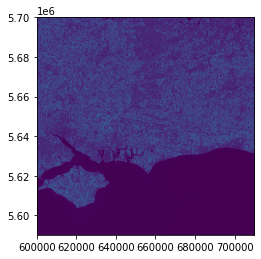

<AxesSubplot:>

In [11]:
plot.show(b8)

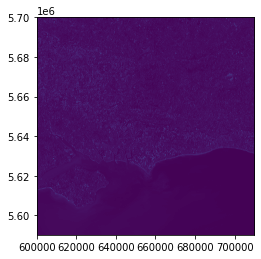

<AxesSubplot:>

In [12]:
plot.show(b4)# matplot plotting

In [13]:
b4.dtypes

('uint16',)

In [14]:
b4.crs# get coordinate reference sysytem

CRS.from_epsg(32630)

In [15]:
# dimensions of single pixel in meters
xres = (b4.bounds.right-b4.bounds.left)/b4.width
yres = (b4.bounds.top-b4.bounds.bottom)/b4.height
print(xres,yres)
print("are the pixels square: {}".format(xres==yres))

10.0 10.0
are the pixels square: True


In [16]:
#convert pixel coordinates to world coordinates.
#upper left pixel
row_min = 0
col_min = 0
# low right pixel. rows and columns are zero indexing
row_max = b4.height - 1
col_max = b4.width - 1
 #transform of coordinates with the data set's affine transformation
topleft = b4.transform * (row_min,col_min)
botright = b4.transform * (row_max,col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (600000.0, 5700000.0)
Bottom right corner coordinates: (709790.0, 5590210.0)


In [17]:
b4.profile

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 5700000.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}

In [18]:
b4.read(1)

array([[788, 312, 166, ..., 395, 452, 254],
       [376, 174, 159, ..., 696, 468, 313],
       [425, 183, 134, ..., 933, 636, 526],
       ...,
       [260, 261, 258, ...,  63,  66,  64],
       [274, 261, 265, ...,  65,  60,  53],
       [258, 261, 268, ...,  54,  52,  58]], dtype=uint16)

# RGB image

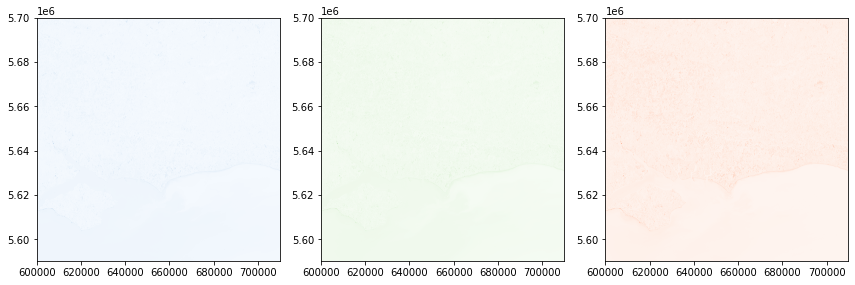

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))
plot.show(b2, ax = ax1, cmap='Blues')
plot.show(b3, ax = ax2, cmap='Greens')
plot.show(b4, ax = ax3, cmap='Reds')
fig.tight_layout()

In [20]:
truecolor = rio.open('/home/jannette/Downloads/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.SAFE/GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/sentineltruecolor.tiff','w',driver='Gtiff',
                     width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]
                    )
truecolor.write(b2.read(1),3) 
truecolor.write(b3.read(1),2) 
truecolor.write(b4.read(1),1) 
truecolor.close()

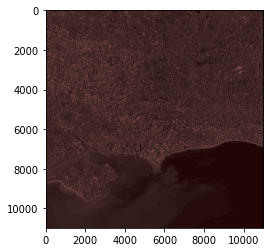

In [21]:
src = rio.open(r"/home/jannette/Downloads/S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.SAFE/GRANULE/L2A_T30UXB_A010316_20190226T111048/IMG_DATA/R10m/sentineltruecolor.tiff",count=3)
plt.imshow(src.read(1),cmap = 'pink')
plt.show()

# NDVI Creation

In [24]:
b4.shape

(10980, 10980)

In [ ]:
!pip install earthpy

In [ ]:
pip install rioxarray

In [ ]:
# import os
# import earthpy.spatial as es
# import rioxarry as rxr

In [29]:
#data = os.path.join("home",
#                     "jannette",
#                     "Downloads",
#                     "S2B_MSIL2A_20190226T111049_N0211_R137_T30UXB_20190226T172349.SAFE",
#                     "GRANULE",
#                     "L2A_T30UXB_A010316_20190226T111048",
#                     "IMG_DATA",
#                     "R10m/T30UXB_20190226T111049_B04_10m.jp2"
#)

In [ ]:
#ndvi_data = rxr.rio(data)

In [ ]:
#ndvi_data.shape

In [ ]:
#ndvi = es.normalized_diff(ndvi_data[3],ndvi_data[0])

In [ ]:
#ep.plot_bands(ndvi,cmap='PiYG',scale = False,vmin=-1, vmax=1)
#plt.show()

In [39]:


# # read Red(b4) and NIR(b8) as arrays
# red = b4.read()
# nir = b8.read()

# # Calculate ndvi
# ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# # Write the NDVI image
# meta = b4.meta
# meta.update(driver='GTiff')
# meta.update(dtype=rasterio.float32)

# with rio.open('NDVIs.tif', 'w', **meta) as dst:
#     dst.write(ndvi.astype(rio.float32))